In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = yf.download("BTC-USD", start="2018-01-01", end="2024-12-31").reset_index()
df["weekdays"] = df["Date"].dt.weekday



/var/folders/9t/lw84bl150216vm671xpk_6zm0000gn/T/ipykernel_29488/1190094119.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2018-01-01", end="2024-12-31").reset_index()
[*********************100%***********************]  1 of 1 completed


In [11]:
buy = df[df["weekdays"] == 6]["Open"]

sell = df[df["weekdays"] == 2]["Close"]

Profit:

In [18]:
weekly_profit = sell.values[:len(buy)] - buy.values  

initial_money = 1000

total_money = initial_money + weekly_profit.cumsum()

total_profit = weekly_profit.sum()
print("سود کل:", total_profit)
print("سرمایه نهایی:", total_money[-1])

سود کل: -6254.461181640625
سرمایه نهایی: -5254.461181640625


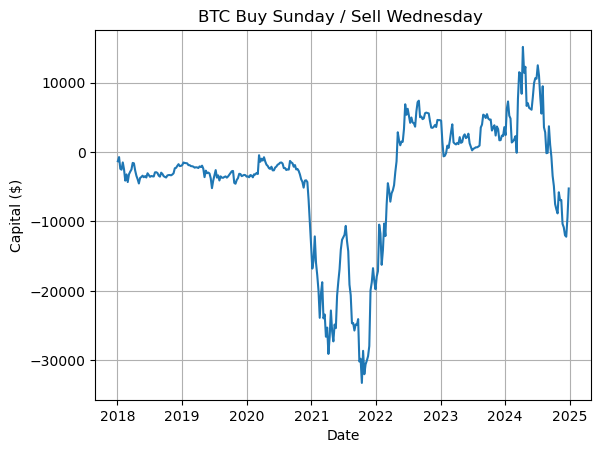

In [20]:
plt.plot(df[df["weekdays"] == 2]["Date"].values[:len(total_money)], total_money)
plt.title("BTC Buy Sunday / Sell Wednesday ")
plt.xlabel("Date")
plt.ylabel("Capital ($)")
plt.grid()
plt.show()